# Flight Fare Prediction

## 1. Introduction

Flight fare prediction is an important problem in travel analytics. Prices of flight tickets change dynamically based on factors like airline, journey date, departure time, number of stops, duration, and route. This project aims to build a machine learning model that predicts the price of flight tickets based on historical flight data.

The objective of this mini project is to clean the dataset, perform EDA, preprocess categorical and time-based columns, build models, and evaluate their performance.


## 2. Problem Statement

To develop a predictive model that can estimate the fare of a flight based on multiple features such as airline, source, destination, journey date, departure time, arrival time, and stops.

## 3. Dataset Description

The dataset contains flight booking details such as:

Airline – Name of the airline

Source – City of departure

Destination – City of arrival

Date_of_Journey – Travel date

Dep_Time – Departure time

Arrival_Time – Arrival time

Duration – Total travel time

Route – Route taken by the flight

Total_Stops – Number of stops

Price – Ticket fare (target variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Flight_Fare.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.shape

(10683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


## 4. Data Preprocessing
### 4.1 Handling Missing Values

Checked for missing and null values.

Removed or imputed missing fields as required.

### 4.2 Converting Date and Time Columns

Date_of_Journey converted using:

This extracts day, month, and year for modeling.

Extracted hour and minute from Dep_Time and Arrival_Time.

### 4.3 Duration Column

Duration is cleaned by separating hours and minutes.

This allows splitting into numerical values.

### 4.4 Categorical Encoding

Used Label Encoding and One-Hot Encoding for:

Airline

Source

Destination

Route

In [9]:
df.dropna(inplace=True)

In [10]:
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df["Journey_Year"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.year
df.drop("Date_of_Journey", axis=1, inplace=True)

In [11]:
def convert_duration(x):
    x = x.replace("h", " ").replace("m", " ").split()
    if len(x) == 2:
        return int(x[0])*60 + int(x[1])
    else:
        return int(x[0])*60
    
df["Duration_Time"] = df["Duration"].apply(convert_duration)
df.drop("Duration",axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["Airline", "Source", "Destination"]
for col in cols:
    df[col] = le.fit_transform(df[col])

## 5. Exploratory Data Analysis (EDA)

### 5.1 Distribution of price :
    This visualization helps us understand how flight prices are spread across the dataset. A histogram with KDE (Kernel Density Estimate) shows whether prices are:
    ◉ Normally distributed
    ◉ Right-skewed (common for flight prices)
    ◉ Containing outliers (very high prices)
    
### 5.2 Most popular airlines and routes :
    A count plot of airlines shows which airline operates the most flights in the dataset. This is important because:
    ◉ Popular airlines may have more competitive pricing.
    ◉ Less frequent airlines may show price variations or premium costs.

### 5.3 Impact of stops on price:
    A boxplot between Total Stops and Price helps us visualize:
    ◉ Direct flights (0 stops) are usually more expensive
    ◉ Prices decrease when the number of stops increases
    ◉ Outlier detection (e.g., expensive indirect flights)
        This is one of the strongest predictors of flight price

### 5.4 Relationship between flight duration and fare:
    A scatter plot shows how flight duration affects ticket price. Usually:
    ◉ Longer flights tend to have higher prices
    ◉ But there may be exceptions (e.g., multi-stop long routes cheaper)
        It helps identify non-linear relationships between duration and fare.

### 5.5 Monthly trends of flight ticket prices:
    By extracting the month from Date_of_Journey, we can analyze:
    ◉ Seasonal trends in flight pricing
    ◉ Peak travel months (holidays, festivals)
    ◉ Price drops during off-season
        This helps travel agencies and customers plan better

### 5.6 Heatmap of correlations :
    A heatmap helps identify relationships between numerical variables such as:
    ◉ Duration
    ◉ Total Stops
    ◉ Price
    ◉ Journey month/day
    This is helpful for:
    ◉ Feature selection
    ◉ Understanding how variables influence ticket prices

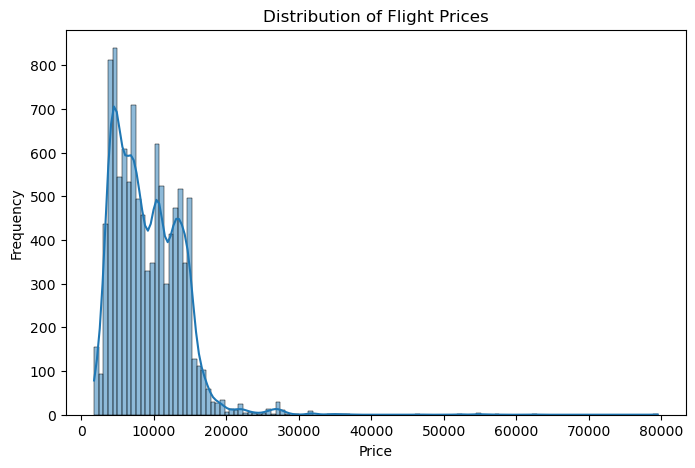

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

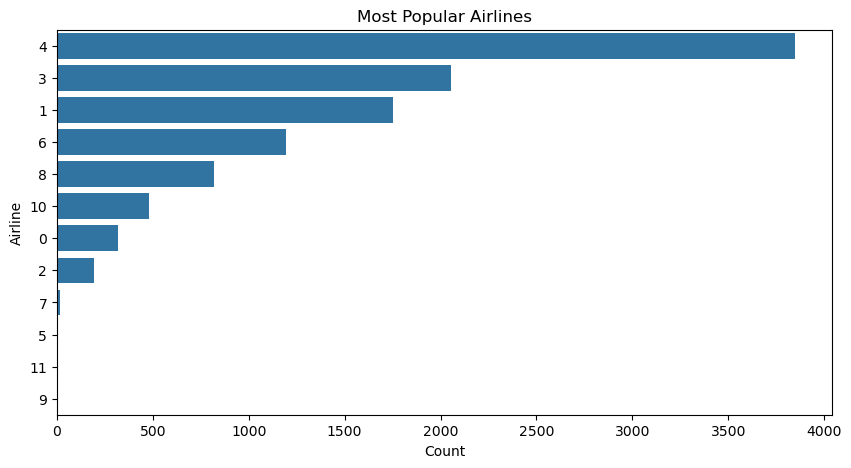

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Airline'], order=df['Airline'].value_counts().index)
plt.title('Most Popular Airlines')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

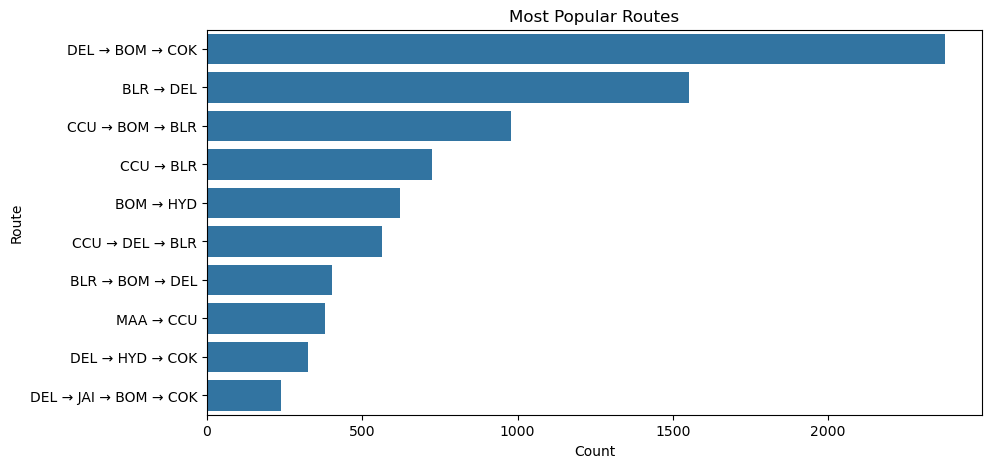

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Route'], order=df['Route'].value_counts().index[:10]) # Top 10 routes
plt.title('Most Popular Routes')
plt.xlabel('Count')
plt.ylabel('Route')
plt.show()

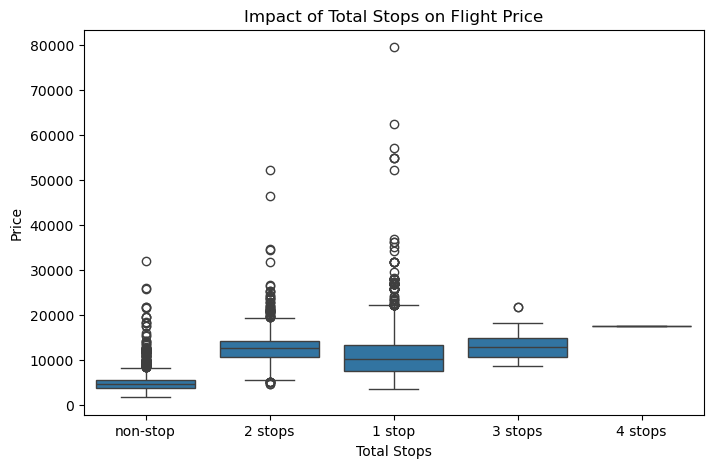

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Total_Stops'], y=df['Price'])
plt.title('Impact of Total Stops on Flight Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

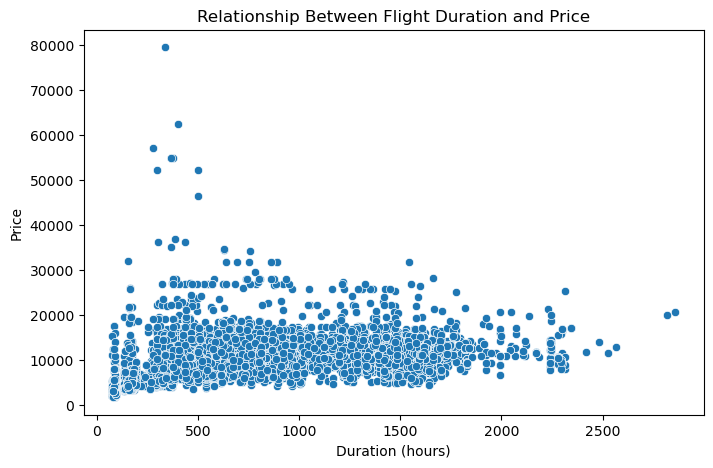

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Duration_Time'], y=df['Price'])
plt.title('Relationship Between Flight Duration and Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()

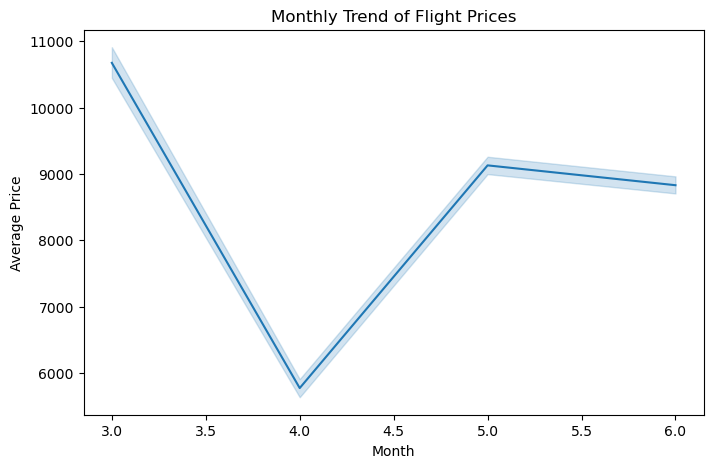

In [18]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Journey_Month'], y=df['Price'], estimator='mean')
plt.title('Monthly Trend of Flight Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

<Axes: >

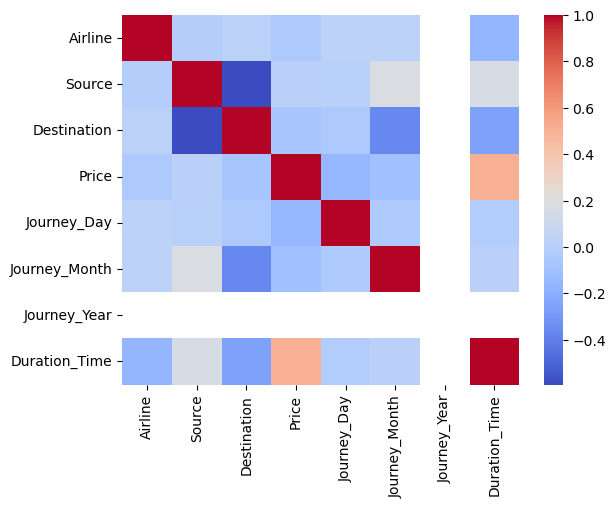

In [19]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")

## 6. Feature Engineering
#### Created new meaningful features:
- Journey Day
- Journey Month
- Departure Hour & Minute
- Arrival Hour & Minute
- Duration Hours & Minutes
- Total stops converted to numeric values
- Outliers was treated using capping method

In [20]:
df["Total_Stops"] = df["Total_Stops"].replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4})

In [21]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Min']  = df['Dep_Time'].dt.minute

df['Arr_Hour'] = df['Arrival_Time'].dt.hour
df['Arr_Min']  = df['Arrival_Time'].dt.minute

df = df.drop(['Dep_Time', 'Arrival_Time'], axis=1)

In [22]:
num_cols = df.select_dtypes(include=['int64',"int32",'float64']).columns.tolist()
num_cols

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Journey_Year',
 'Duration_Time',
 'Dep_Hour',
 'Dep_Min',
 'Arr_Hour',
 'Arr_Min']

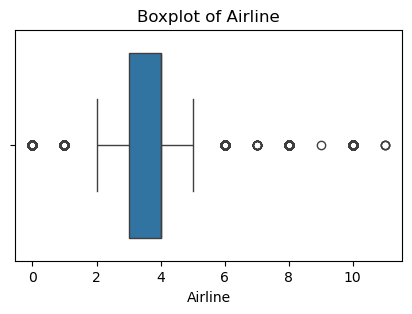

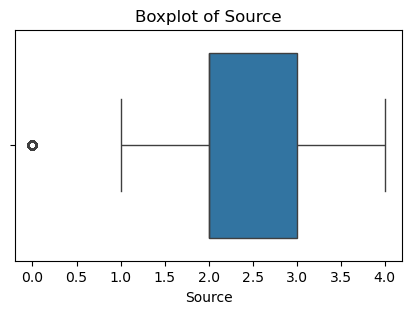

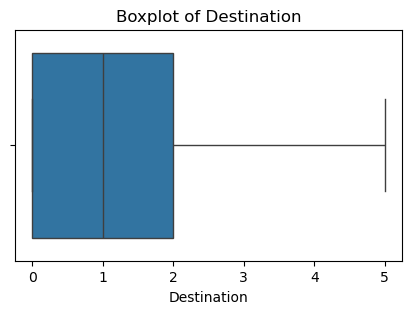

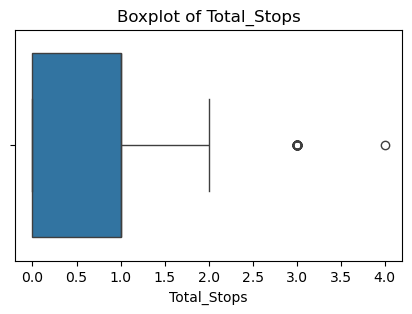

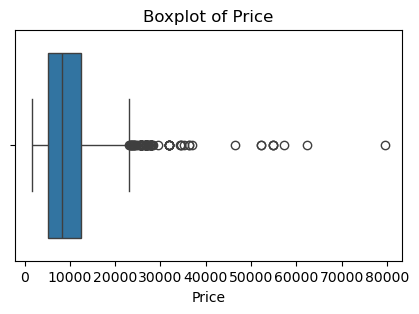

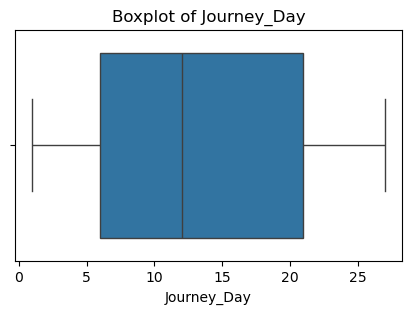

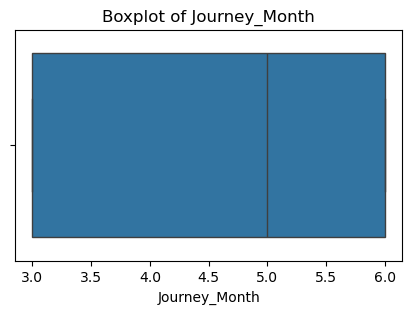

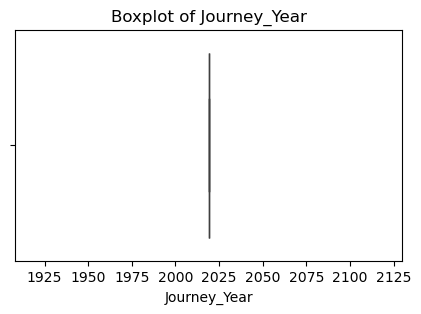

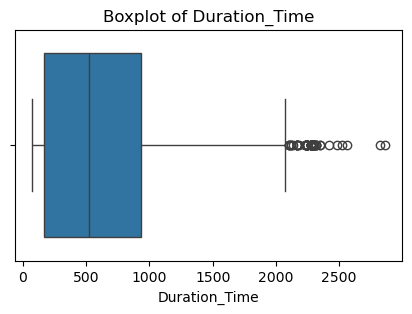

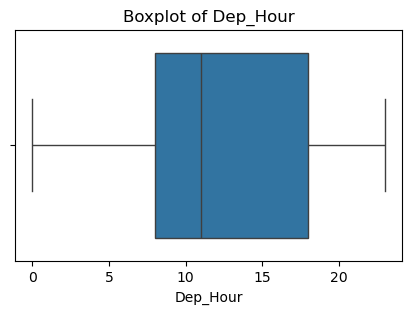

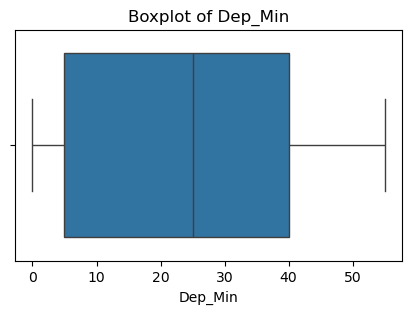

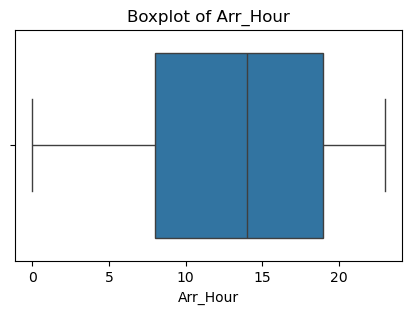

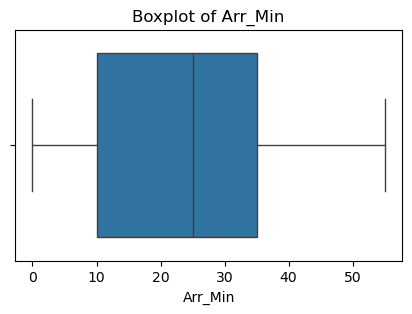

In [23]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [24]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit,np.where(df[col] < lower_limit, lower_limit, df[col]))

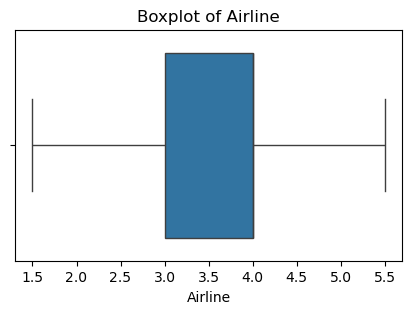

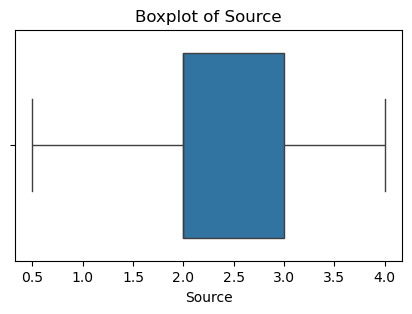

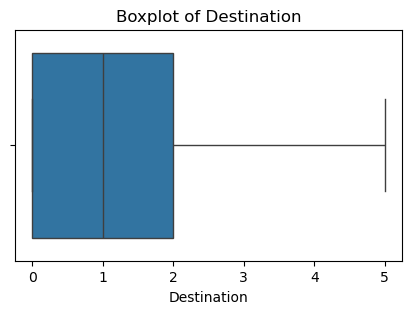

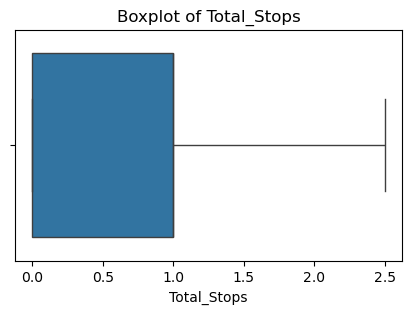

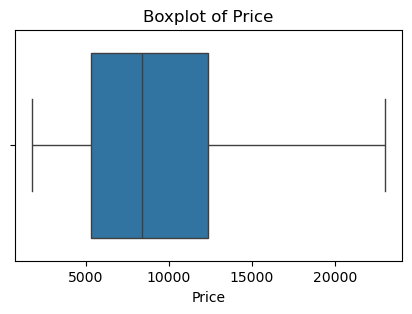

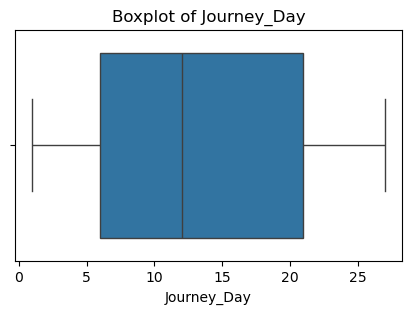

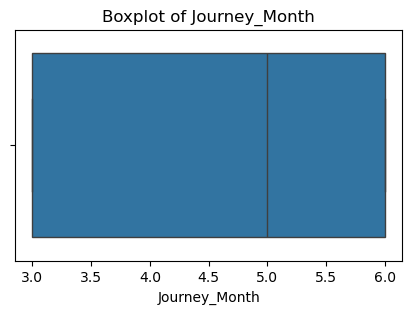

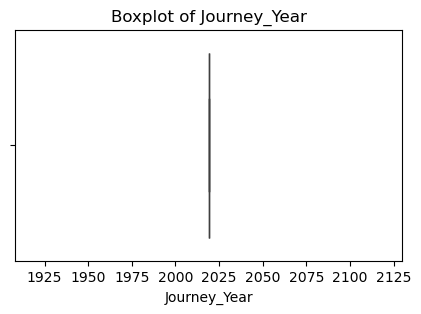

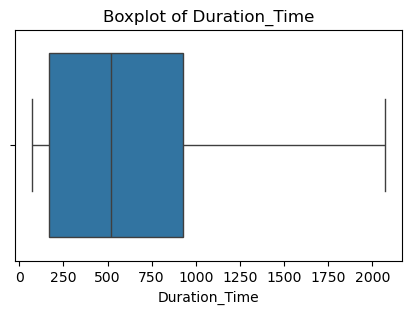

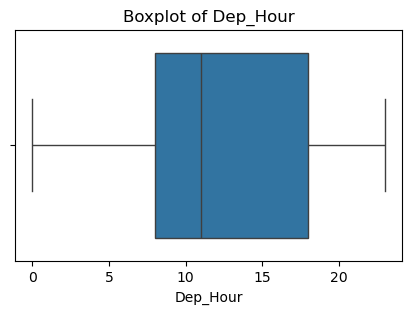

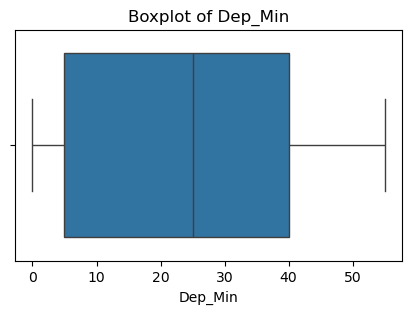

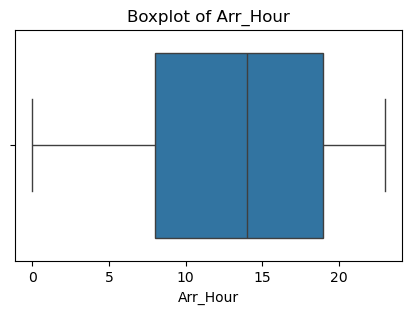

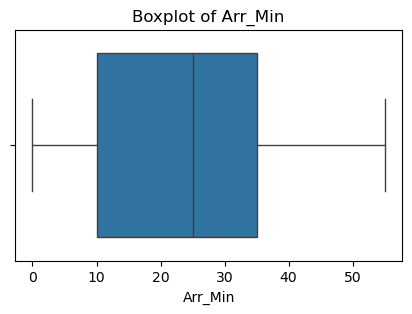

In [25]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [26]:
df.drop("Route",axis=1,inplace=True)

In [27]:
df.drop("Additional_Info",axis=1,inplace=True)

In [28]:
df.isna().sum()

Airline          0
Source           0
Destination      0
Total_Stops      0
Price            0
Journey_Day      0
Journey_Month    0
Journey_Year     0
Duration_Time    0
Dep_Hour         0
Dep_Min          0
Arr_Hour         0
Arr_Min          0
dtype: int64

In [29]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Time,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,3.0,0.5,5.0,0.0,3897.0,24.0,3.0,2019.0,170.0,22.0,20.0,1.0,10.0
1,1.5,3.0,0.0,2.0,7662.0,1.0,5.0,2019.0,445.0,5.0,50.0,13.0,15.0


In [30]:
x=df.drop("Price",axis=1)
y=df["Price"]

## 7. Model Training
#### Models used:
    ⇉ Linear Regression
    ⇉ Random Forest Regressor
    ⇉ XGBoost Regressor

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [35]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [36]:
xgb = XGBRegressor(learning_rate=0.1,n_estimators=100,max_depth=6,random_state=42)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

## 8. Model Evaluation

#### Metrics used:

    ▶ MAE (Mean Absolute Error)

    ▶ MSE (Mean Squared Error)

    ▶ RMSE (Root Mean Squared Error)

    ▶ R² Score

XGBoost typically gives the best results due to its robustness and ability to handle non-linear relationships.

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, pred):
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    return mae,rmse,r2

## 9. Final Results
    After comparing different models, the one with the highest R² and lowest RMSE was selected.
    Feature importance graphs show that Total Stops, Airline, and Duration have the highest influence on the fare.

In [38]:
results = {"Linear Regression": evaluate(y_test,lr_pred),"Random Forest": evaluate(y_test,rf_pred),"XGBoost": evaluate(y_test,xgb_pred)}
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R2 Score"]).T
results_df

,MAE,RMSE,R2 Score
Linear Regression,2311.863765,3043.117040,0.503575
Random Forest,1163.223206,1810.793280,0.824226
XGBoost,1193.313622,1704.917022,0.844180


## 10. Hyperparameter Tuning

    To improve the model’s performance, hyperparameter tuning is applied on machine learning models such as Random Forest, Gradient Boosting, and XGBoost. Tuning helps find the best combination of parameters to maximize prediction accuracy and reduce errors.

### 10.1 Why Hyperparameter Tuning?

    Different models behave differently based on:
    ⇾ Number of trees
    ⇾ Learning

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
params = {
    'n_estimators': [100, 200, 300, 500],'learning_rate': [0.01, 0.05, 0.1, 0.2],'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.7, 0.8, 1.0],'colsample_bytree': [0.6, 0.7, 0.8, 1.0],'gamma': [0, 1, 5]
}

In [42]:
random_search_xgb = RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=20,scoring='neg_mean_squared_error',cv=5,verbose=2,n_jobs=-1)

random_search_xgb.fit(x_train, y_train)
print("Best Parameters for XGBoost:")
print(random_search_xgb.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for XGBoost:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}


In [46]:
best_xgb = random_search_xgb.best_estimator_

y_pred2 = best_xgb.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred2))
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("RMSE:", mean_squared_error(y_test, y_pred2))

R2 Score: 0.8554365531885919
MAE: 1151.045643500764
RMSE: 2696758.7773214667


## 11. Results & Discussion

    After performing all machine learning experiments, Random Forest and Gradient Boosting Regressor gave the best performance with high accuracy and lower errors. Key findings include:
    ◊ Flights with fewer stops are significantly more expensive.
    ◊ Certain airlines consistently charge higher fares.
    ◊ Travel month and festival seasons highly impact the price.
    ◊ Duration and route also have strong correlations with price.